---
#  mplfinance
---
## Some examples of using the new mplfinance package.
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__

'0.24.2'

In [3]:
#%matplotlib qt  # use this to have plots outside of the notebook.
%matplotlib inline

---

## Read in two data sets for the S&P 500 from November of 2019
## One is daily data, one is Intraday data:

In [4]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-26,3134.85,3142.69,3131.00,3140.52,986041660
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [5]:
iday = pd.read_csv('data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
iday = iday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
iday.index.name = 'Date'
iday.shape
iday.head(3)
iday.tail(3)

(1605, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96


## Importing mplfinance

In [6]:
import mplfinance as mpf

---
## Plot some daily data:

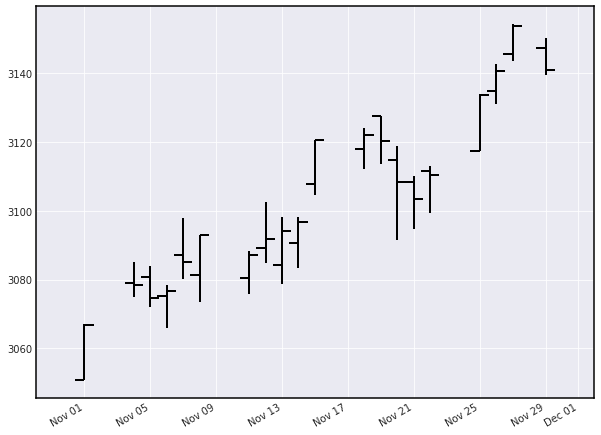

In [7]:
mpf.plot(daily)  # the default plot type is 'OHLC'

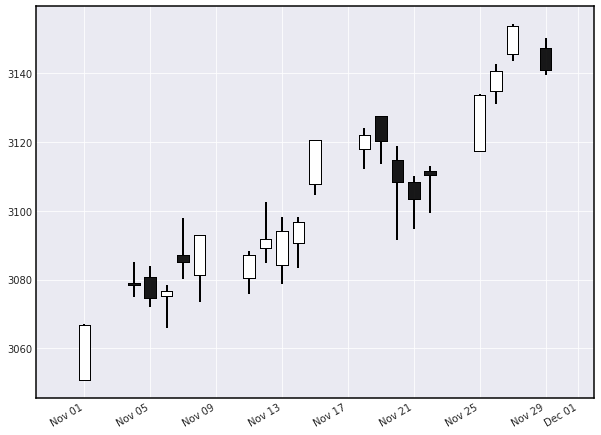

In [8]:
mpf.plot(daily,type='candlestick') # but we can plot candlesticks also

---
## Now plot some Intraday data (with one-minute open/high/low/close)
## Notice that, for Intraday data the x-axis automatically adjusts to show TIME 

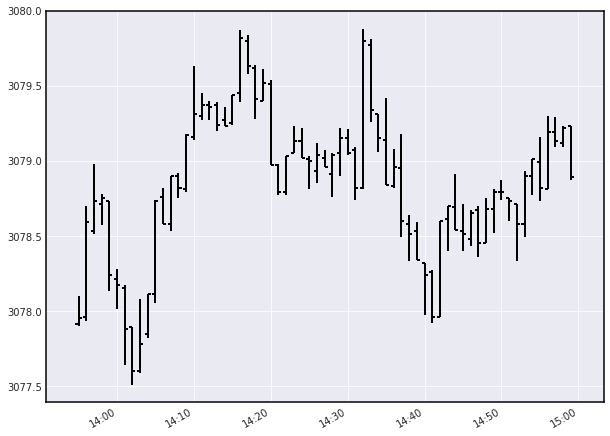

In [9]:
mpf.plot(iday[265:330])

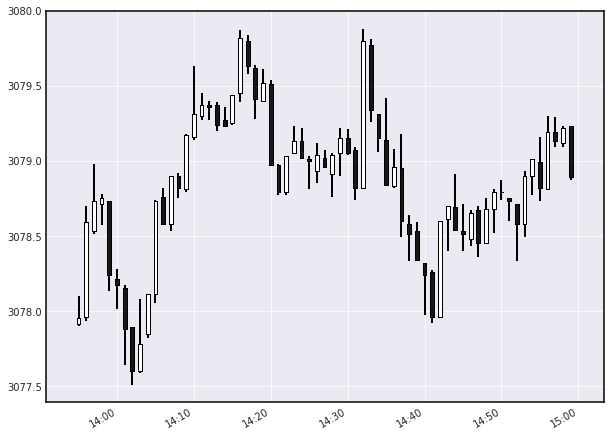

In [10]:
mpf.plot(iday[265:330],type='candlestick')

---
## We can also display moving averages:

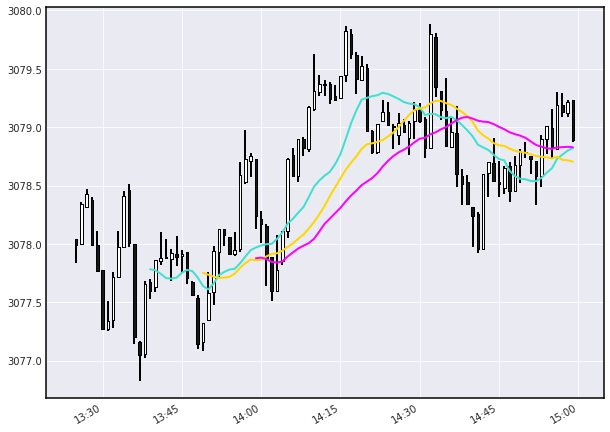

In [11]:
mpf.plot(iday[235:330],type='candlestick',mav=(15,25,35))

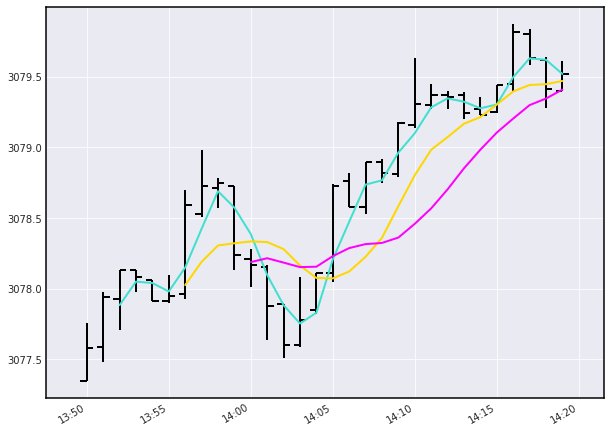

In [12]:
mpf.plot(iday[260:290],type='ohlc',mav=(3,7,11))

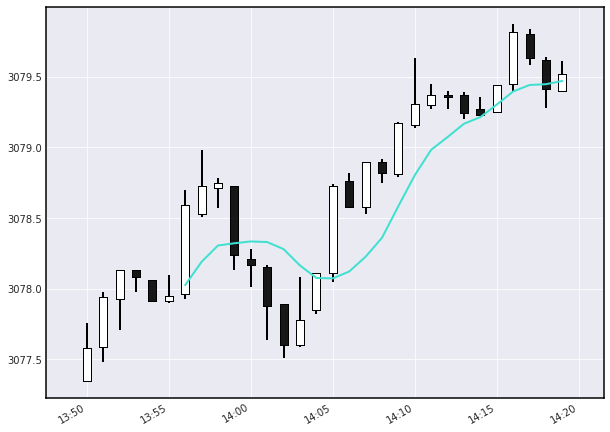

In [13]:
mpf.plot(iday[260:290],type='candlestick',mav=7)

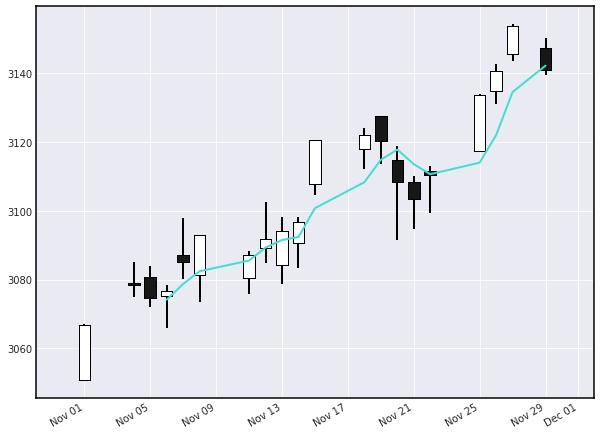

In [14]:
mpf.plot(daily,type='candlestick',mav=4)